In [2]:
# package imports
import pandas as pd
import numpy as np 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics

from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.model_selection import train_test_split

# Dataframe、Series

## Series

### 创建
Series的字符串表现形式为：索引在左边，值在右边。如果没有为数据指定索引，于是会自动创建一个0到N-1（N为数据的长度）的整数型索引。你可以通过Series的values和index属性获取其数组表示形式和索引对象

In [24]:
se1 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
se1
type(se1.values)
type(se1.index)
se1.name = 'name_test'
se1.index.name = 'in'
se1

d    4
b    7
a   -5
c    3
dtype: int64

numpy.ndarray

pandas.core.indexes.base.Index

in
d    4
b    7
a   -5
c    3
Name: name_test, dtype: int64

### 索引
Series索引（obj[...]）的工作方式类似于NumPy数组的索引，只不过Series的索引值不只是整数。并且普通的Python切片运算不同，其末端是包含的

In [68]:
se1['d':'a']
se2 = se1[se1>3] #等价于se1[se1.values>3]
se2
type(se2)

in
d    4
b    7
a   -5
Name: name_test, dtype: int64

in
d    4
b    7
Name: name_test, dtype: int64

pandas.core.series.Series

## DataFrame

### 创建
最常见的方法就是直接传入一个由等长列表或NumPy数组组成的字典

In [83]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
df1 = pd.DataFrame(data)
df1
col = df1.columns
type(col)

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


pandas.core.indexes.base.Index

### 索引

#### 使用方法索引
1. loc vs iloc https://blog.csdn.net/Xw_Classmate/article/details/51333646

In [75]:
#loc是对行标签、列标签进行索引；iloc是对行号、列号进行索引
df=pd.DataFrame(np.arange(20).reshape(4,5),index=['ind0','ind1','ind2','ind3'],columns=['col0','col1','col2','col3','col4'])
df
#索引行
df.loc['ind2'] 

#索引列.当然获取某列数据最直接的方式是df.[列标签]，但是当列标签未知时可以通过这种方式获取列数据
df.loc[:'ind2', 'col0']

df.iloc[1:3,0:2]

,col0,col1,col2,col3,col4
ind0,0,1,2,3,4
ind1,5,6,7,8,9
ind2,10,11,12,13,14
ind3,15,16,17,18,19


col0    10
col1    11
col2    12
col3    13
col4    14
Name: ind2, dtype: int64

ind0     0
ind1     5
ind2    10
Name: col0, dtype: int64

,col0,col1
ind1,5,6
ind2,10,11


#### 直接索引
通过类似数组下表的方式或属性的方式

In [100]:
#传入一个值或list是对列索引
#str是返回一个Series

type(df1['state'])
# df1.state == df1['state']
df1['state'].notna()
df1.state.notna
#列表是返回DataFrame
type(df1[['state']])

#传入切片或运算符是对行索引
df1[:2]
df1[df1['year']>2001]['state']

pandas.core.series.Series

0    True
1    True
2    True
3    True
4    True
5    True
Name: state, dtype: bool

<bound method Series.notna of 0      Ohio
1      Ohio
2      Ohio
3    Nevada
4    Nevada
5    Nevada
Name: state, dtype: object>

pandas.core.frame.DataFrame

,state,year,pop,is_pop,is_ok
0,Ohio,2000,1.5,0.0,1.0
1,Ohio,2001,1.7,0.0,1.0


2      Ohio
4    Nevada
5    Nevada
Name: state, dtype: object

### 修改

### 删除

In [80]:
df1['is_Ohio'] = df1['state'] == 'Ohio'
df1

del df1['is_Ohio'] #等价于df1.drop('is_Ohio', axis = 1, inplace=True)，如果不想动元数据，先copy

df1

,state,year,pop,is_Ohio
0,Ohio,2000,1.5,True
1,Ohio,2001,1.7,True
2,Ohio,2002,3.6,True
3,Nevada,2001,2.4,False
4,Nevada,2002,2.9,False
5,Nevada,2003,3.2,False


,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


### 其他

In [115]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
df1 = pd.DataFrame(data)

null_age = df1[df1['pop'].notna()]
type(null_age.iloc[:, :2])

pandas.core.frame.DataFrame

In [ ]:
df = pd.read_csv('train.csv')

age_df = df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]

# 乘客分成已知年龄和未知年龄两部分
known_age = age_df[age_df['Age'].notnull()]
unknown_age = age_df[age_df['Age'].isnull()]

# y即目标年龄
y = known_age[:, 0]

# Numpy 

## random随机
1. https://blog.csdn.net/vicdd/article/details/52667709


### 随机种子
设置全局随机种子，就不用单独给每个函数设置了

https://blog.csdn.net/weixin_41712499/article/details/82083517

In [5]:
np.array([[[1], [1]], [2,2,2]])

array([list([[1], [1]]), list([2, 2, 2])], dtype=object)

In [73]:
# type(frame1.loc[0,'state'])
# frame1.loc[int('0'),'state']
frame1.loc[1,'aa'] = frame1.loc[int(),'aa']
frame1
# frame2.loc[frame1.loc[0,'state'],'year']

'5'

In [60]:
data = [[1,2,3],[4,5,6]]
index = ['d','e']
columns=['a','b','c']
df = pd.DataFrame(data=data, index=index, columns=columns)
df

,a,b,c
d,1,2,3
e,4,5,6


In [62]:
df.loc['d','a']

1

In [ ]:
frame1['year'] = 0
for i in frame1.index:
#     print(i)
#     print(frame1.loc[i,'state'])
#     print(frame2.loc[i,'year'])
    frame2.loc[frame1.loc[i,'state'], 'year']
#     frame1[i,'year'] = frame2[frame1.loc[i,'state'], 'year']
frame1

In [87]:
data = pd.DataFrame(np.arange(16).reshape(4,4),index=list('abcd'),columns=list('ABCD'))
data_np = data.as_matrix()
x = data_np[:, 1:]
data['A']

/Users/maowei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


a     0
b     4
c     8
d    12
Name: A, dtype: int64

In [92]:
from sklearn import preprocessing
import numpy as np
x = np.array([ 1., -1.,  2., 2])
x.reshape(-1,1)

array([[ 1.],
       [-1.],
       [ 2.],
       [ 2.]])

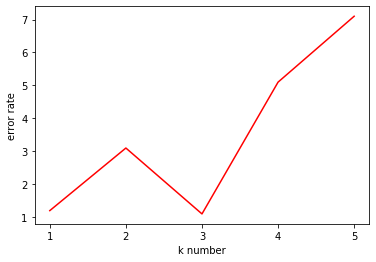

In [70]:
x1 = list(range(1,6))
y1=[1.2,3.1,1.1,5.1,7.1]

plt.xticks(x1)
plt.xlabel('k number')
plt.ylabel('error rate')
plt.plot(x1, y1,'r')
plt.show()

In [104]:
a = np.array([[1,2],[3,4]])
b = np.array([[5,6],[7,8]])
c = np.concatenate((a,b))
c.shape[0]

4

In [59]:
for c in dict1:
    print(c,':',dict1[c])
list(dict1.values()).index("runoob")
# dict1(dict1.keys())

name : runoob
2 : 1
2 : www.runoob.com


0

In [44]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
'year': [2000, 2001, 2002, 2001, 2002, 2003],
'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)
frame.index.name = 'iname'; frame.columns.name = 'cname'
frame

cname,state,year,pop
iname,,,
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


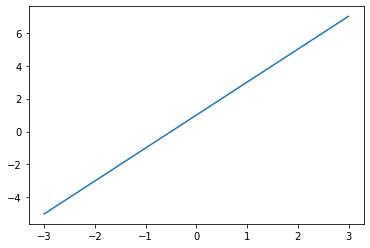

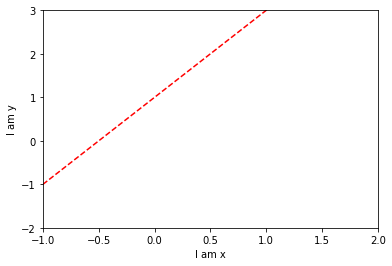

In [61]:

x=np.linspace(-3,3,2)
y=2*x+1
plt.figure()
plt.plot(x,y)

x1=np.linspace(-3,3,5)
y1=2*x1+1
plt.figure()
plt.plot(x1,y1,color='red',linestyle='--')
plt.xlim((-1, 2))
plt.ylim((-2, 3))
plt.xlabel('I am x')
plt.ylabel('I am y')

plt.show()

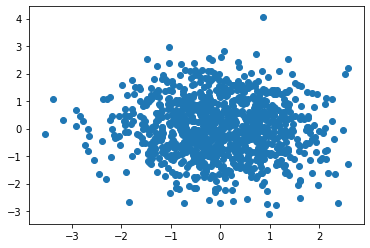

In [62]:
n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)

plt.scatter(X,Y)
plt.show()


Shape of sample = (100, 3)


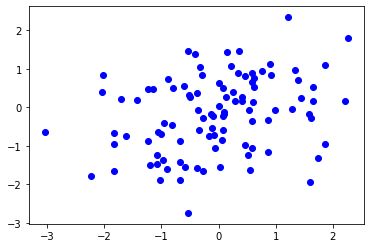

In [77]:
def make_dist(mean, cov, dist_num, n = 100, seed = 123):
    nr.seed(seed)
    sample = nr.multivariate_normal(mean, cov, n) # Compute the 2-d Normally distributed data
    sample = np.column_stack((sample, np.array([dist_num]*n))) ## Add the distribution identifier
    print('Shape of sample = ' + str(sample.shape))
    return(sample)

cov = np.array([[1.0, 0.4], [0.4, 1.0]])
mean = np.array([0.0, 0.0])
sample1 = make_dist(mean, cov, 1)
plt.scatter(sample1[:,0], sample1[:,1], color = 'blue')

In [101]:
s = np.random.normal(0, 1, 100)
s

array([ 0.41956768,  0.20692752, -2.25153499, -0.58897055,  1.13115191,
        0.13507767, -1.21226896,  0.69077727, -0.47912295,  0.36005073,
        0.37692011, -1.1186956 ,  0.78982803, -1.0075088 , -1.30578587,
       -0.88282899, -0.34609003,  0.10940316, -0.77258373,  0.74481931,
        0.25146418, -0.69479822,  0.88899292,  1.16106836, -0.0986847 ,
       -0.21498304, -1.77377135, -0.40751259, -0.29150671,  0.24537941,
       -0.16842643,  0.24402694,  1.53409029, -0.5299141 , -0.49097228,
       -1.30916531, -0.00866047,  0.97681298, -1.75107035, -0.66585697,
        0.0359405 ,  0.85010288,  0.38287024,  0.32546363, -0.22431279,
        0.48187426,  1.01430388, -1.70899178,  0.7285354 , -0.09875981,
       -0.52998886, -2.44307579, -1.38035132,  1.69805899, -0.68854853,
       -1.08476877, -0.45642596, -0.74514722,  0.12435863,  1.51697368,
       -0.58661595,  0.15429005, -1.14723714,  1.52016644,  0.18904344,
       -1.08181912,  0.90430622,  1.19998765,  0.16145636, -1.63

<BarContainer object of 8 artists>

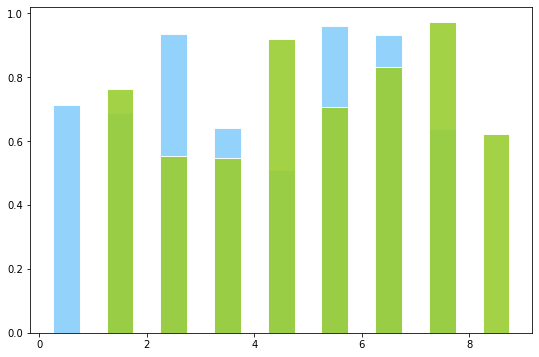

In [99]:
plt.figure(figsize=(9,6))
n = 8
X = np.arange(n)+1 #X是1,2,3,4,5,6,7,8,柱的个数
#uniform均匀分布的随机数，normal是正态分布的随机数，0.5-1均匀分布的数，一共有n个
Y1 = np.random.uniform(0.5,1.0,n)
Y2 = np.random.uniform(0.5,1.0,n)
plt.bar(X-0.5, Y1, alpha=0.9, width = 0.5, facecolor = 'lightskyblue', edgecolor = 'white', label='one', lw=1)
plt.bar(X+0.5, Y2, alpha=0.9, width = 0.5, facecolor = 'yellowgreen', edgecolor = 'white', label='second', lw=1)

# 

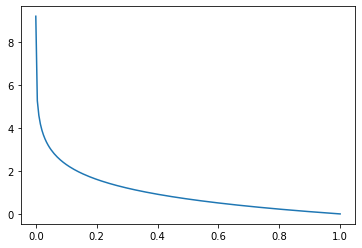

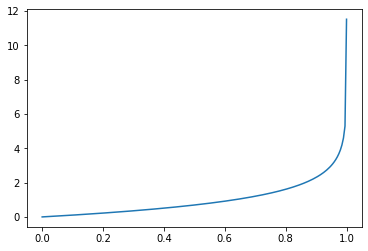

In [8]:
X = np.linspace(0.0001,1,200) 
y = [(-np.log(x)) for x in X]
plt.plot(X,y) 
plt.show()

X = np.linspace(0,0.99999,200) 
y = [(-np.log(1-x)) for x in X]
plt.plot(X,y) 
plt.show()

In [13]:
xx, yy = np.meshgrid(np.linspace(-1, 1, 5),np.linspace(-3, 3, 1))
xx

array([[-1. , -0.5,  0. ,  0.5,  1. ]])

In [20]:
X=np.c_[(.4,-.7),(-1.5,-1),(-1.4,-.9),(-1.3,-1.2),(-1.1,-.2),(-1.2,-.4),(-.5,1.2),(-1.5,2.1),(1,1),
         (1.3,.8),(1.2,.5),(.2,-2),(.5,-2.4),(.2,-2.3),(0,-2.7),(1.3,2.1)].T
X

array([[ 0.4, -0.7],
       [-1.5, -1. ],
       [-1.4, -0.9],
       [-1.3, -1.2],
       [-1.1, -0.2],
       [-1.2, -0.4],
       [-0.5,  1.2],
       [-1.5,  2.1],
       [ 1. ,  1. ],
       [ 1.3,  0.8],
       [ 1.2,  0.5],
       [ 0.2, -2. ],
       [ 0.5, -2.4],
       [ 0.2, -2.3],
       [ 0. , -2.7],
       [ 1.3,  2.1]])